In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os


In [3]:
nose = cv2.CascadeClassifier('models/nose.xml')

mouth = cv2.CascadeClassifier('models/mouth.xml')

face = cv2.CascadeClassifier('models/face.xml')

eyes = cv2.CascadeClassifier('models/eye.xml')


error: OpenCV(4.5.3) :-1: error: (-5:Bad argument) in function 'imwrite'
> Overload resolution failed:
>  - imwrite() missing required argument 'img' (pos 2)
>  - imwrite() missing required argument 'img' (pos 2)


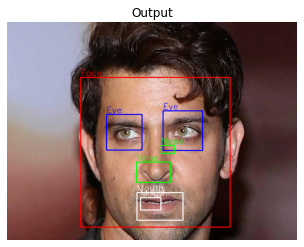

In [4]:

imgs = os.listdir('img/')

for i in imgs:
    img = cv2.imread(f'img/{i}', 0)

    col = cv2.imread(f'img/{i}')
    col = cv2.cvtColor(col, cv2.COLOR_BGR2RGB)

    def draw_boundary(img, classifier, scaleFactor, minNeighbors, color, text):
        gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        features = classifier.detectMultiScale(gray_img, scaleFactor, minNeighbors)
        coords = []
        for (x, y, w, h) in features:
            cv2.rectangle(img, (x,y), (x+w, y+h), color, 2)
            cv2.putText(img, text, (x, y-4), cv2.FONT_HERSHEY_SIMPLEX, 0.8, color, 1, cv2.LINE_AA)
            coords = [x, y, w, h]
        return coords


    def detect(img, faceCascade, eyeCascade, noseCascade, mouthCascade):
        color = {"blue":(255,0,0), "red":(0,0,255), "green":(0,255,0), "white":(255,255,255)}
        coords = draw_boundary(img, faceCascade, 1.1, 10, color['blue'], "Face")
        if len(coords)==4:
            roi_img = img[coords[1]:coords[1]+coords[3], coords[0]:coords[0]+coords[2]]
            coords = draw_boundary(roi_img, eyeCascade, 1.1, 5, color['red'], "Eye")
            coords = draw_boundary(roi_img, noseCascade, 1.1, 4, color['green'], "Nose")
            coords = draw_boundary(roi_img, mouthCascade, 1.5, 8, color['white'], "Mouth")
        return img

    col = detect(col, face, eyes, nose, mouth)
    plt.imshow(col)
    plt.title("Output")
    plt.axis('off')
    cv2.imwrite(f'detected/{i}.jpg', col)
